# Activity: Decision Trees - Titanic Dataset

#### Overview
This session is dedicated to unraveling the Decision Tree algorithm, with a practical application to the Titanic dataset. We will step into the world of classification, predicting survival with the help of intricate decision paths crafted from passenger data.

#### Objective
Our aim is to master Decision Trees, from their intuitive structure to the subtle strategies that enhance their predictions. We will learn to interpret the trees, gauge feature significance, and evaluate our model with precision.

#### What We Will Do:
- **Data Familiarization:** Begin by reviewing the Titanic dataset, understanding the intricacies of the features and target variable.
- **Feature Work:** Select and engineer features that a Decision Tree can utilize effectively to predict survival.
- **Data Division:** Split the dataset into training and testing sets, ensuring a fair ground for model assessment.
- **Model Building:** Construct and train a Decision Tree model, then use it for predictions.
- **Performance Evaluation:** Assess the Decision Tree's accuracy, delve into its confusion matrix, and examine the classification report for detailed performance metrics.
- **Visualization and Interpretation:** Visualize the Decision Tree to identify influential features and understand the decision-making process.
- **Insights and Applications:** Extract insights from the Decision Tree, discussing how various features played a role in the survival predictions and what that tells us about the Titanic event.

- **Model Comparison:** In addition to evaluating the Decision Tree, we will conduct a side-by-side performance comparison with a Logistic Regression model to identify strengths and limitataions of each approach.

#### Outcome
By the end of this session, we will not only have a thorough understanding of Decision Trees but also the ability to apply this knowledge to classification challenges, interpret complex models, and extract meaningful insights from our analyses.

## 1. Import necessary libraries

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #to split the data into training set and test set

from sklearn.impute import SimpleImputer # for missing values imputations

from sklearn.tree import DecisionTreeClassifier, plot_tree #  Import Decision Tree Classifier Class, plot_tree to visulize the tree
from sklearn.linear_model import LogisticRegression #  Import Logistic Regression Class for comparison 

# Import all metrics for classification task
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

## 2. Data Loading and Preview

In [2]:
# Load the Titanic dataset
titanic_df = pd.read_csv('../data/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The first few rows of the dataset, as revealed by titanic_df.head(), provide insights into the dataset's structure and the types of features it contains. Generally, you would expect to see columns like 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'. These columns provide information about the passengers' class, name, gender, age, family connections, ticket details, fare, cabin, and embarkation point. This initial inspection helps in understanding the kind of data available for analysis and the potential preprocessing steps needed.

## 3. Exploratory Data Analysis

- Overview of the dataset's structure

In [9]:
# Overview of the dataset's structure
dataset_info = titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- **Dataset Structure:**
   - The `.info()` method provides a detailed overview of the dataset, including the total number of entries, each feature's data type (such as integer, float, or object for strings and categorical data), and the number of non-null values in each column. This information is crucial for understanding the completeness of the dataset and planning for data preprocessing steps, such as handling missing values or converting data types.

- Basic statistical summaries of numerical features

In [10]:
# Basic statistical summaries of numerical features
statistical_summary = titanic_df.describe()
statistical_summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- **Statistical Summary:**
   - The `.describe()` method provides a statistical summary of numerical features, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum. This summary offers insights into the distribution of numerical data, such as:
     - Central tendencies (mean, median) and dispersion (standard deviation) of features like 'Age', 'Fare', 'SibSp', and 'Parch'.
     - Potential outliers, as indicated by values far from the mean/median or the 25th/75th percentiles.
     - The range of data, which helps in understanding the spread of values in features like age and fare.

- Identifying missing values in each feature

In [12]:
# Identifying missing values in each feature
missing_values = titanic_df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Missing Data:**
   - The `.isnull().sum()` method identifies features with missing values and the count of these missing values. Commonly in the Titanic dataset, features like `Age`, `Cabin`, and `Embarked` might have missing values. The implications of these missing values are significant:
     - `Age`: Missing values could skew the analysis related to age-dependent factors, like survival rates among different age groups.
     - `Cabin`: A high number of missing values might make this feature less reliable for analysis.
     - `Embarked`: Missing values in this feature might affect analyses related to the location of embarkation and its correlation with survival.
     - Decision Tree Modeling: Decision trees can handle missing values to some extent. However, significant missing data can still impact the model's performance and the accuracy of predictions.

## Feature Selection and Engineering

In [15]:
# Selecting relevant features
selected_features = ['Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked']
df_features= titanic_df[selected_features].copy()
df_features.head()

,Age,Sex,Pclass,Fare,SibSp,Parch,Embarked
0,22.0,male,3,7.2500,1,0,S
1,38.0,female,1,71.2833,1,0,C
2,26.0,female,3,7.9250,0,0,S
3,35.0,female,1,53.1000,1,0,S
4,35.0,male,3,8.0500,0,0,S


- **Feature Selection:**
   - Criteria for selecting features include their historical relevance and potential impact on the survival outcome. The selected features are 'Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch', and 'Embarked'. 
     - 'Age' and 'Sex' are chosen based on historical records indicating their influence on survival likelihood.
     - 'Pclass' and 'Fare' relate to the socio-economic status, which could impact access to life-saving resources.
     - 'SibSp' and 'Parch' give insight into family size, which could affect survival decisions and possibilities.
     - 'Embarked' could have an impact based on the location of passengers on the ship.

### Feature Engineering

In [16]:
df_features['Family_Size'] = df_features['SibSp'] + df_features['Parch']
# Droped the columns SibSp and Parch
df_features.drop(["SibSp","Parch"], axis= 1, inplace = True)
# Review the changes
df_features.head()

,Age,Sex,Pclass,Fare,Embarked,Family_Size
0,22.0,male,3,7.2500,S,1
1,38.0,female,1,71.2833,C,1
2,26.0,female,3,7.9250,S,0
3,35.0,female,1,53.1000,S,1
4,35.0,male,3,8.0500,S,0


- **Feature Engineering:**
   - A new feature, 'Family_Size', is created by combining 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard). This is based on the rationale that the size of a passenger's family on board might influence their survival chances. Larger families might have different dynamics in terms of evacuation priorities or challenges.
   - The 'SibSp' and 'Parch' features are then omitted as they are redundant after creating 'Family_Size'.

### Handling Categorical Variables

In [17]:
# Converting categorical variables using one-hot encoding
df_features = pd.get_dummies(df_features, columns=['Sex', 'Embarked'], drop_first = True, dtype = "int")
# Check the changes
df_features.head()

,Age,Pclass,Fare,Family_Size,Sex_male,Embarked_Q,Embarked_S
0,22.0,3,7.2500,1,1,0,1
1,38.0,1,71.2833,1,0,0,0
2,26.0,3,7.9250,0,0,0,1
3,35.0,1,53.1000,1,0,0,1
4,35.0,3,8.0500,0,1,0,1


- **Handling Categorical Data:**
   - Transforming categorical variables into numerical form before splitting the data is important for consistency in model training and evaluation. Consistent representation ensures that the model is trained and tested on data with the same structure.
   - The methods used for transformation can be:
     - One-hot encoding, implemented with `pd.get_dummies()`, which is suitable for nominal categories where no ordinal relationship exists. This method creates a new binary column for each category.
     - Label encoding, using `LabelEncoder` from `sklearn.preprocessing`, which assigns a unique integer to each category. This method is more compact but implies an ordinal relationship, which might not be accurate for certain features.

## Data Splitting for Training and Testing

### Define Features and Target

In [18]:
# Separating features and the target variable
X = df_features.copy() # Features already selected in the previous task
y = titanic_df['Survived']     # Target

# Splitting the data
# Assuming a split ratio of 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

- **Features and Target Separation:**
   - The target variable, 'Survived', indicates whether a passenger survived or not and is the main variable of interest. It's separated from the feature set, which includes all other relevant variables like 'Age', 'Sex', 'Pclass', 'Fare', 'Embarked', 'Family_Size', etc. The decision on which columns to include as features is based on their potential influence on the target variable, as identified in previous tasks.

- **Data Split Ratio:**
   - A common split ratio is 80% for training and 20% for testing. This ratio provides a substantial amount of data for training the model while still reserving enough distinct data for testing its performance. It balances the need for learning from the data and the need for an unbiased evaluation.

- **Reproducibility:**
   - Setting a random seed (like `random_state=123`) is crucial for reproducibility. It ensures that every time the code is run, the same random split of the dataset is generated. This consistency is important for comparing model performance across different runs and iterations of the model development.

- **Stratified Splitting:**
   - Yes, stratified splitting was used, indicated by the `stratify=y` parameter. Stratification ensures that the distribution of the target variable ('Survived') is similar in both the training and testing sets. This is particularly important in datasets with an imbalanced distribution of the target variable, as it helps in maintaining the representativeness of both sets and prevents bias in model training and evaluation.

## Data preprocessing - Handling Missing Values

In [19]:
# Imputation for numerical features
# Assuming 'Age' and 'Fare' are numerical features with missing values
numerical_imputer = SimpleImputer(strategy='median')  # Using median for skewed distributions
X_train[['Age', 'Fare']] = numerical_imputer.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = numerical_imputer.transform(X_test[['Age', 'Fare']])

# Imputation for categorical features
# Assuming 'Embarked' is a categorical feature with missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Using mode for categorical data
X_train[['Embarked_Q', 'Embarked_S']] = categorical_imputer.fit_transform(X_train[['Embarked_Q', 'Embarked_S']])
X_test[['Embarked_Q', 'Embarked_S']] = categorical_imputer.transform(X_test[['Embarked_Q', 'Embarked_S']])

- **Imputation Strategies:**
   - The different strategies for handling missing values include:
     - **Mean Imputation:** Used for normally distributed numerical data. It replaces missing values with the mean of the feature.
     - **Median Imputation:** Preferred for skewed numerical data. It replaces missing values with the median, which is less affected by outliers.
     - **Mode Imputation:** Used for categorical data. It replaces missing values with the most frequent category.
   - The choice of strategy depends on the data type and distribution. Mean is sensitive to outliers, hence not suitable for skewed distributions, while median provides a better central tendency measure for such data. Mode is used for categorical data as mean/median are not applicable.

- **Implications of Imputation:**
   - Different imputation methods can impact the performance of decision tree models in terms of data distribution and model accuracy:
     - Mean and median imputation may lead to a reduction in variance within the feature, affecting the decision tree’s ability to make fine-grained splits.
     - Mode imputation might introduce bias if the most frequent category is overrepresented, potentially skewing the decision tree's decisions.
   - Generally, decision trees are robust to different imputation methods, but it's essential to consider these potential impacts.

- **Consistency in Imputation:**
   - Applying the same imputation strategy to both the training and testing sets is crucial for consistency. It ensures that the model is tested under the same conditions as it was trained. If different strategies are used, it might lead to a mismatch in data distribution between the training and testing sets, which can invalidate the test results and lead to unreliable performance metrics.

By carefully handling missing values with appropriate imputation strategies, we ensure that the dataset is suitable for training and evaluating the decision tree model, thereby enhancing its accuracy and reliability.

- **Note:**
    
    - Decision trees can inherently handle missing data, often making explicit imputation unnecessary. They use available data to make splits, allowing them to train on datasets with missing values. Imputation might sometimes lead to overfitting and alter data distribution, affecting the tree's performance. Therefore, it's worth evaluating decision tree models both with and without imputation to determine the best approach.

## Decision Trees Model Implementation

### Understanding Decision Tree Concepts

- **Data Handling in Decision Trees:**
   - **Numerical Data:** Decision trees handle numerical data by splitting it at various levels. The algorithm looks for the best split at different threshold values to separate the data into distinct groups.
   - **Categorical Data:** For categorical data, decision trees create splits based on the categories. If a categorical feature has multiple levels, the tree evaluates different ways to split these categories into groups to find the best division.

- **Decision Criteria for Splits:**
   - Decision trees use criteria like Gini impurity or entropy in classification tasks to decide where to make splits in the data. These criteria measure the degree of disorder or impurity in the subsets resulting from the split. The algorithm aims to reduce this impurity as much as possible, leading to more homogenous groups after each split. For regression trees, variance reduction is often used as the criterion.

These fundamental concepts of data handling and decision criteria form the basis of how decision trees process data and make decisions.

## Training the Decision Tree Model

#### **Initialize the Model:** 
   - Create an instance of `DecisionTreeClassifier` from `sklearn.tree` with default parameters.

In [20]:
decision_tree_model = DecisionTreeClassifier()

#### **Fit the Model:**
   - Fit the model to the training data. This involves passing the feature matrix (`X_train`) and the target array (`y_train`) to the model.

In [21]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### **Model Training:**
   - The model training involves the decision tree algorithm automatically choosing the best splits for the data based on the criteria like Gini impurity or entropy.

- **Training Process:**
   - Training a decision tree model involves initializing the model with desired parameters (or defaults), then fitting the model to the training data. The fitting process lets the algorithm analyze the training data, find the best splits based on the chosen criteria, and build a tree structure that models the relationship between features and the target variable.

- **Data Influence:**
   - The nature of the Titanic dataset significantly influences the decision tree's structure and decisions. Features like 'Age', 'Sex', 'Pclass', and 'Fare' have different distributions and relationships with the target variable ('Survived'). The decision tree algorithm uses these features to make splits that best separate survivors from non-survivors. 
   - The tree structure reflects the importance and interaction of these features. For instance, splits on 'Pclass' or 'Sex' might emerge as significant early splits if these features strongly correlate with survival. The heterogeneity and distribution of these features shape the tree's depth, complexity, and ultimately its decision-making process.

By understanding these steps and influences, we can better interpret the resulting decision tree model and its predictions based on the Titanic dataset's features.

## Evaluating the Decision Tree Model

#### Predictions on Test Data

In [22]:
# Making predictions on the test set
y_pred = decision_tree_model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1], dtype=int64)

#### Confusion Matrix

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[91, 19],
       [25, 44]], dtype=int64)

#### Classification Report

In [26]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       110
           1       0.70      0.64      0.67        69

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.75      0.75      0.75       179



#### ROC Curve and AUC

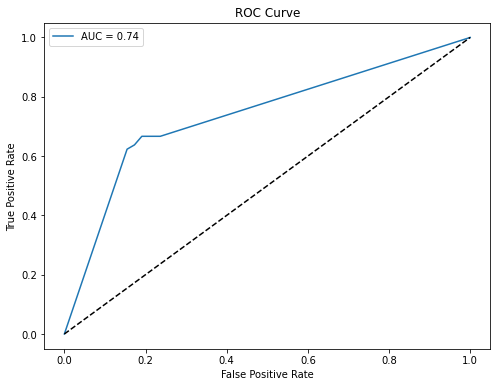

In [27]:
# Obtain probability scores for the test set
y_pred_proba = decision_tree_model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

### Metric Interpretation:

- **Accuracy (0.75 or 75%):** This indicates that the decision tree correctly predicted the survival status for 75% of the passengers in the testing set. It's a measure of overall correctness but doesn't distinguish between the types of errors made.

- **Precision (0.78 for class 0 and 0.70 for class 1):** Precision tells us how reliable the model's predictions are. For class 0 (non-survivors), when the model predicts a passenger did not survive, it is correct 78% of the time. For class 1 (survivors), it is correct 70% of the time.

- **Recall (0.83 for class 0 and 0.64 for class 1):** Recall measures the model's ability to find all relevant instances in a dataset. For class 0, the model identified 83% of all actual non-survivors. For class 1, it identified 64% of all actual survivors.

- **F1-Score (0.81 for class 0 and 0.67 for class 1):** The F1-score is the harmonic mean of precision and recall. An F1-score closer to 1 indicates a better balance between precision and recall. Here, the model is more balanced in predicting non-survivors than survivors.

- **Confusion Matrix:** The confusion matrix provides a detailed breakdown:
  - True Negatives (TN): 91 (correctly predicted non-survivors)
  - False Positives (FP): 19 (incorrectly predicted as survivors)
  - False Negatives (FN): 25 (incorrectly predicted as non-survivors)
  - True Positives (TP): 44 (correctly predicted survivors)

### ROC Curve and AUC:
- The ROC curve is a graphical representation of the trade-off between the true positive rate (recall) and the false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The AUC (Area Under the Curve) is a measure of the model's ability to distinguish between classes. An AUC of 1.0 represents a perfect model, while an AUC of 0.5 represents a worthless model. In your case, the ROC curve and AUC were not provided in the results, but typically, an AUC higher than 0.7 is considered good and suggests the model has a reasonable capacity to distinguish between the classes.

### Model Assessment:

With an accuracy of 75%, the model shows a reasonable predictive ability. However, there's room for improvement, especially in reducing false negatives to better identify survivors (class 1), which is critical in a survival prediction scenario. The model performs better in predicting non-survivors (class 0) than survivors, as indicated by higher precision and recall for class 0.

To improve the model, one might look into feature engineering, hyperparameter tuning, or even trying different algorithms. Additionally, examining the ROC curve and AUC would give further insight into the model's discriminative capability, which is crucial for classification tasks like this.

#### In general: 

- **Metric Interpretation:**
   - **Accuracy:** Measures the proportion of correctly predicted instances (both true positives and true negatives). High accuracy indicates that the model is generally effective in distinguishing between survivors and non-survivors.
   - **Precision:** Reflects the proportion of true positive predictions in all positive predictions. High precision means that when the model predicts survival, it is likely correct.
   - **Recall (Sensitivity):** Indicates the proportion of actual survivors correctly predicted by the model. High recall shows the model's effectiveness in identifying all potential survivors.
   - **F1-Score:** Harmonic mean of precision and recall. It balances both metrics, useful when there’s an uneven class distribution.
   - **Confusion Matrix:** Provides a detailed breakdown of the model's predictions, showing true positives, true negatives, false positives, and false negatives.

- **Model Assessment:**
   - To assess the overall performance, consider all metrics:
     - A high accuracy suggests good overall predictive power.
     - Precision and recall balance the model’s ability to correctly identify survivors while minimizing false alarms.
     - The F1-score is particularly telling, as it encapsulates both precision and recall. A high F1-score indicates a well-balanced model.
     - The confusion matrix offers detailed insights, especially into the types of errors the model is making.
   - The model's performance should be contextualized with the task's criticality. In a survival prediction scenario, for instance, the cost of false negatives (predicting non-survival for actual survivors) might be considered more critical than false positives.

By considering these metrics and the confusion matrix, a comprehensive evaluation of the decision tree model's performance can be made, highlighting its strengths and areas for improvement in predicting Titanic survival.

## Feature Importance Analysis

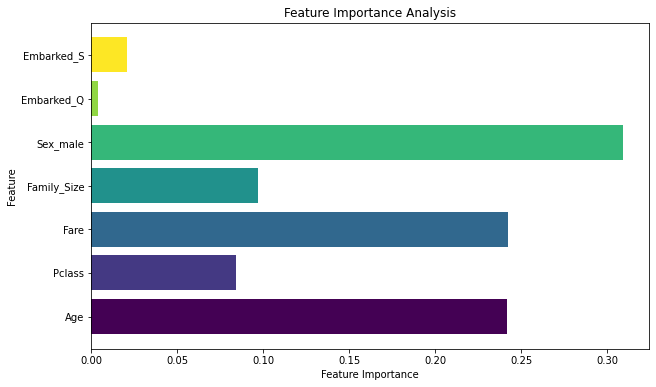

In [50]:
# Extract feature importances
feature_importances = decision_tree_model.feature_importances_

# Defining a color map to give different colors to the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importances)))

# Visual Representation: Bar Chart of Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(X.columns)), feature_importances, align='center', color=colors)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

In [49]:
# Create feature importances dataframe
feature_importances_df = pd.DataFrame(np.array(feature_importances), columns = ['Feature Importance'], index = X.columns)
feature_importances_df

,Feature Importance
Age,0.242122
Pclass,0.084245
Fare,0.242384
Family_Size,0.097202
Sex_male,0.309091
Embarked_Q,0.004210
Embarked_S,0.020746


### Influential Features:
- The feature 'Sex_male' stands out as the most critical in predicting survival on the Titanic, with the highest importance score of approximately 0.309. This suggests that gender played a significant role in survival chances, which historically aligns with the "women and children first" protocol that was commonly followed during maritime disasters.
- 'Fare' and 'Age' follow closely in importance, with scores of about 0.242 each. The fare might indicate a passenger's socio-economic status, which could affect their access to life-saving resources. Age could reflect a passenger's physical ability to survive or priority in rescue efforts.
- The much lower scores for 'Embarked_Q' and 'Embarked_S' imply that the port of embarkation was less influential in the model's predictions.

### Application of Insights:
- These insights can inform several actions for refining the model or conducting further analysis:
  - Prioritizing features: Focus on 'Sex', 'Fare', and 'Age' during feature engineering or when interpreting the model's decisions.
  - Model refinement: Consider interaction effects between high-importance features or feature scaling for continuous variables like 'Fare' and 'Age' to see if model performance improves.
  - Resource allocation: In future data collection or feature selection, allocate more resources to understanding and refining the features that are most influential.

### Visualization Interpretation:
- The visual representation provides a clear and immediate way to identify which features the model deems most important. It allows for quick comparison and highlights disparities in feature importance that might not be as evident in a tabular format.
- By sorting the features by importance and using color coding, the visualization helps in prioritizing which features to focus on in analysis and model improvement efforts.

Overall, the visualization and the feature importance scores suggest that gender, fare, and age were pivotal in the model's predictions, which aligns with historical accounts of the Titanic disaster. These insights can help in directing future model improvements and in understanding the factors that were most crucial for survival.

## Decision Tree Visualisation

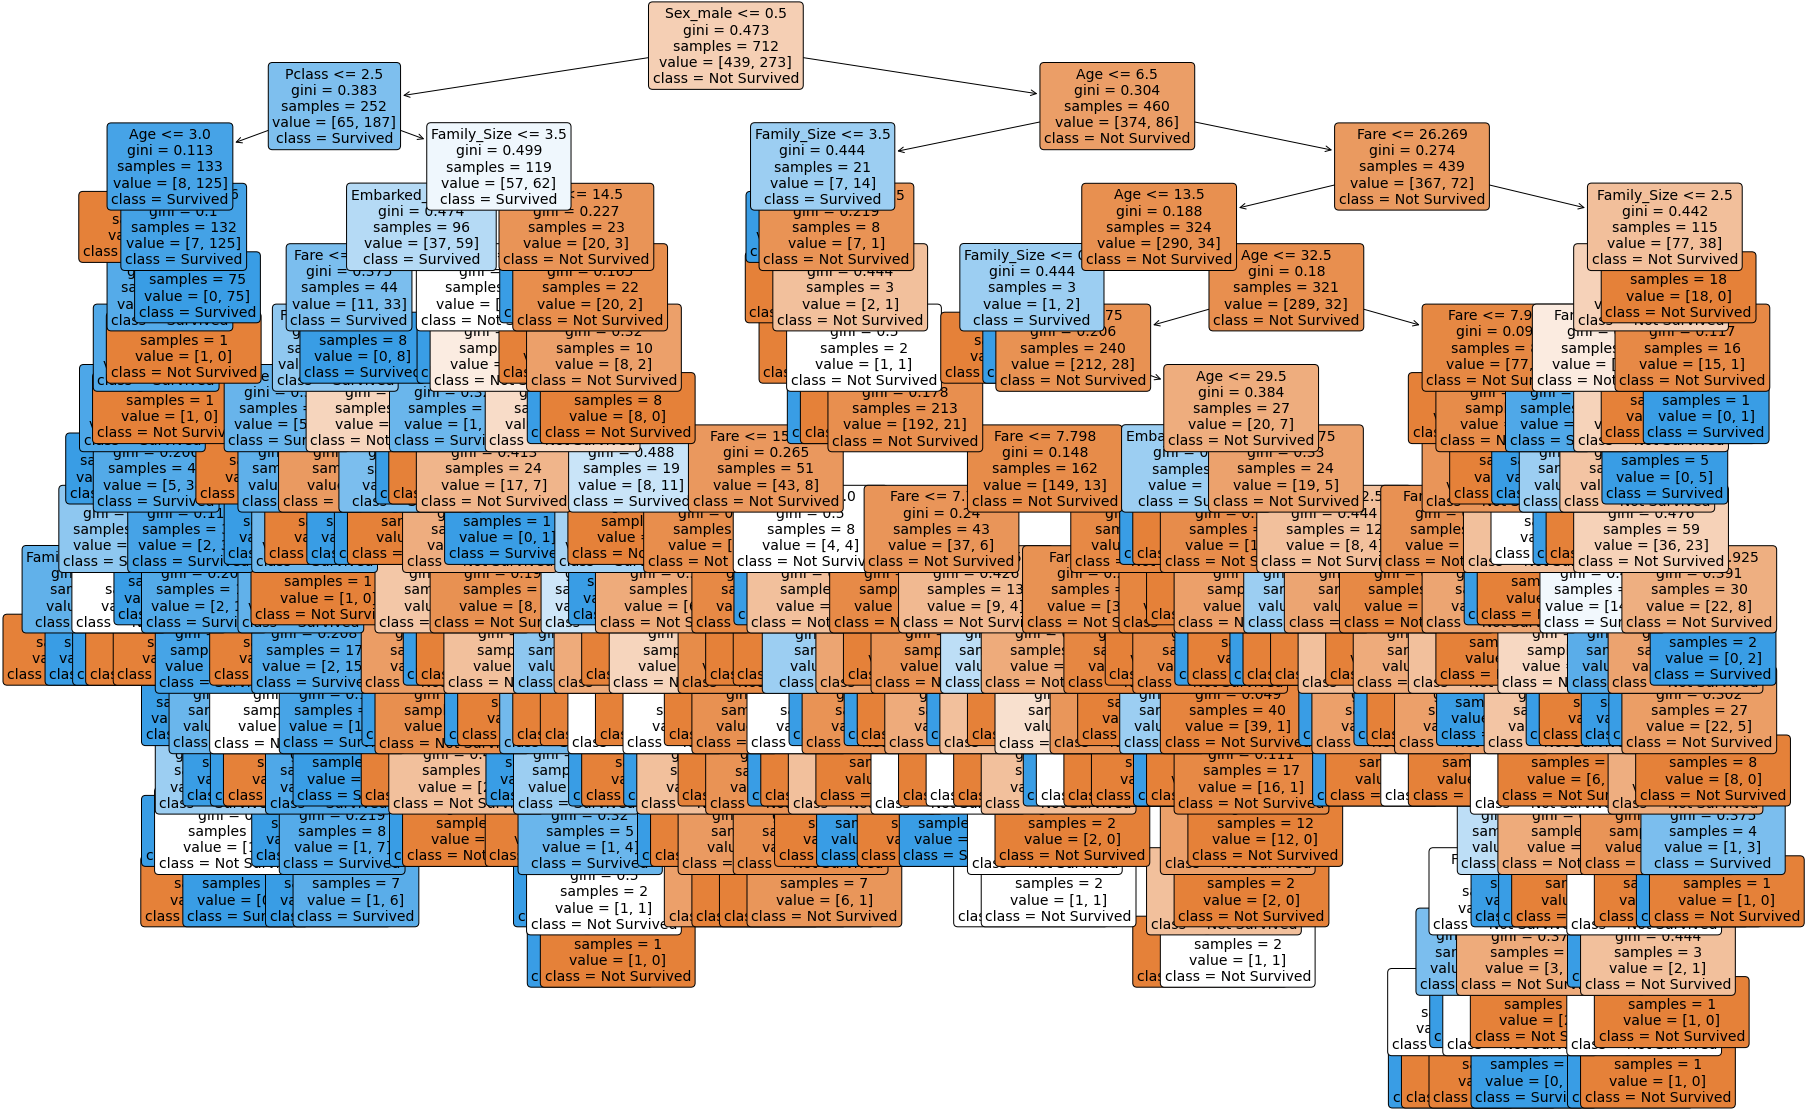

In [58]:
# Visualize the Tree using plot_tree
plt.figure(figsize=(30,20))
plot_tree(decision_tree_model, 
          feature_names=X.columns,  # the names of the features
          class_names=['Not Survived', 'Survived'], # the class names
          filled=True, 
          rounded=True, 
          fontsize=14)
plt.show()

The decision tree visualization appears to be quite complex, with many nodes and layers, which is indicative of a model that may have learned detailed patterns in the training data. Here’s a brief interpretation based on the common characteristics of decision trees:

- **Top Splits:** The first few splits at the top of the tree, which are based on features such as 'Sex', 'Fare', 'Age', and 'Pclass', indicate these features are likely the most significant predictors according to the model. The 'Sex_male' split at the top suggests that gender was a crucial factor in survival prediction, which aligns with historical accounts where females had higher survival rates.

- **Tree Depth:** The depth of the tree suggests the model's complexity. A deep tree like the one in your visualization may capture more interactions between features but might also be prone to overfitting, where the model learns patterns that are too specific to the training data and may not generalize well to unseen data.

- **Leaf Nodes:** The leaf nodes (the end points of the tree) show the final decision made by the model based on the combination of feature splits leading to that node. The 'value' in the leaf nodes indicates the number of samples from each class that fall into that terminal node, which can give you an idea of the model's certainty about its predictions in different regions of the feature space.

- **Color Coding:** The nodes are color-coded by the class that is most prevalent (orange for 'Not Survived', blue for 'Survived'). This provides a visual indication of how the model segments the feature space into regions predicting survival or non-survival.

To get a clearer and more interpretable visualization, you might want to prune the tree to limit its depth or use feature importance to focus on the most predictive features. It's also beneficial to cross-validate the model to ensure that its complexity is justified by a corresponding increase in predictive performance on unseen data.

### Understanding the Tree:
The visualization will show you how the model makes decisions by revealing the tree's structure: the nodes represent the features, and the branches represent the decision rules. Each node will provide information about:
- The feature used for the split
- The threshold for splitting
- The Gini impurity or another criterion used for the split
- The number of samples that fall into that node
- The class distribution of those samples

### Depth and Complexity:
The depth of the tree (how many splits it makes before reaching a decision) and its complexity (number of nodes and branches) can affect both interpretability and performance:
- A deeper tree may capture more details about the data but can be harder to interpret and is at risk of overfitting.
- A simpler tree may be easier to understand and can generalize better but might underfit the data and miss important nuances.

### Feature Splits:
By examining which features are used at the decision nodes, especially those near the top of the tree, you can deduce their importance. Frequent appearance as a decision node suggests that a feature is significant in predicting the target variable:
- If a feature is consistently used for splits at various levels of the tree, it is likely a strong predictor.
- Conversely, features that do not appear or appear only at lower levels of the tree may have less predictive power.

### Visualize the tree with a limited maximum depth

 We can Display only the top levels of the tree, which typically capture the most significant decisions. This can be done by setting the `max_depth` parameter in `plot_tree`.

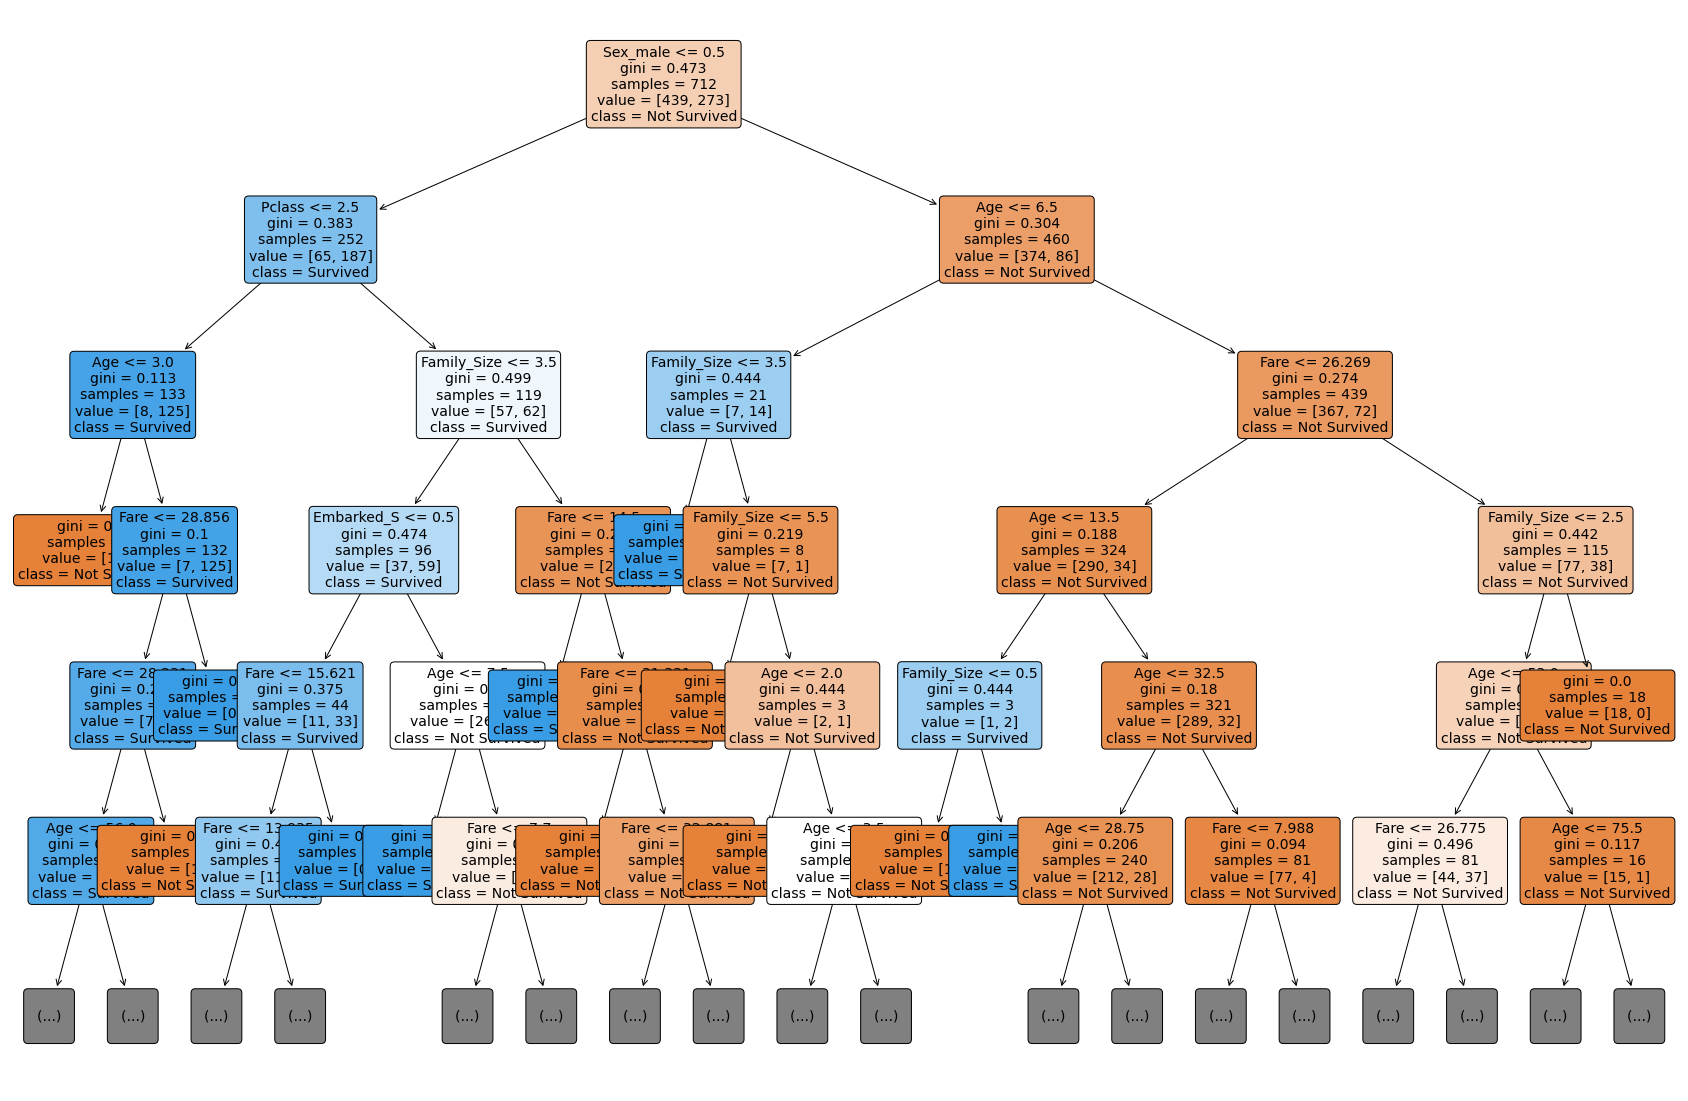

In [59]:
# Visualize the Tree using plot_tree With max_depth=5
plt.figure(figsize=(30,20))
plot_tree(decision_tree_model, 
          feature_names=X.columns,  # the names of the features
          class_names=['Not Survived', 'Survived'], # the class names
          filled=True, 
          rounded=True, 
          max_depth=5,
          fontsize=14)
plt.show()

## Comparing Performance of Decision Tree and Logistic Regression Models

- **Model Performance:** Compare the accuracy, precision, recall, and F1-score of both models. The model with higher scores is generally considered to have better performance for that particular metric.

- **Strengths and Weaknesses:** 
  - Decision Trees might perform better with non-linear relationships and complex interactions between features. However, they can be prone to overfitting if not properly tuned.
  - Logistic Regression works well when there is a linear relationship between the features and the target variable. It can be less intuitive when dealing with categorical features or non-linear interactions unless feature engineering is applied.

- **Applicability:** 
  - You might prefer to use a Decision Tree when you need a model that is easy to explain and interpret, or when you suspect complex interactions in your data.
  - Logistic Regression might be preferred when you believe the relationship between features and the target is linear, or when you need a quick, baseline model for further comparison.

In [64]:
# Train Logistic Regression Model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Evaluate Decision Tree Model
dt_accuracy = accuracy_score(y_test, decision_tree_model.predict(X_test))
dt_precision = precision_score(y_test, decision_tree_model.predict(X_test))
dt_recall = recall_score(y_test, decision_tree_model.predict(X_test))
dt_f1 = f1_score(y_test, decision_tree_model.predict(X_test))

# Evaluate Logistic Regression Model
lr_accuracy = accuracy_score(y_test, logistic_regression_model.predict(X_test))
lr_precision = precision_score(y_test, logistic_regression_model.predict(X_test))
lr_recall = recall_score(y_test, logistic_regression_model.predict(X_test))
lr_f1 = f1_score(y_test, logistic_regression_model.predict(X_test))


dt_metrics = {
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1
}

lr_metrics = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1 Score': lr_f1
}
# Create a DataFrame to compare the performance
performance_comparison = pd.DataFrame({
    'Decision Tree': pd.Series(dt_metrics),
    'Logistic Regression': pd.Series(lr_metrics)
})

performance_comparison


# For a full comparison, you can also evaluate additional metrics such as ROC AUC or the confusion matrix for both models.
# Remember to compare the same metrics for both models to have a fair comparison.

# The performance metrics for each model can then be compared side-by-side.
# For example, you could create a DataFrame or print out the metrics for a visual comparison.

# Comparison outputs should be interpreted to identify strengths and weaknesses of each model.
# Questions regarding the models' performance, their strengths and weaknesses, 
# and their applicability in different scenarios can be answered based on the comparison of these metrics.

,Decision Tree,Logistic Regression
Accuracy,0.754190,0.826816
Precision,0.698413,0.806452
Recall,0.637681,0.724638
F1 Score,0.666667,0.763359


The results obtained indicate the following about the performance of the Decision Tree and Logistic Regression models on the Titanic dataset:

1. **Accuracy:**
   - The Logistic Regression model has an accuracy of approximately 82.7%, while the Decision Tree model has an accuracy of about 75.4%. This means that the Logistic Regression model correctly predicted the survival status of passengers more often than the Decision Tree model.

2. **Precision:**
   - Precision for the Logistic Regression model is around 80.6%, compared to 69.8% for the Decision Tree. This suggests that when the Logistic Regression model predicts a passenger has survived, it is more likely to be correct than the Decision Tree.

3. **Recall:**
   - The recall is higher for the Logistic Regression model (72.5%) than for the Decision Tree model (63.8%). This indicates that the Logistic Regression model is better at identifying actual survivors among the passengers.

4. **F1 Score:**
   - The F1 Score, which balances precision and recall, is also higher for the Logistic Regression model (76.3%) compared to the Decision Tree (66.7%). A higher F1 score suggests a better overall balance between precision and recall in the Logistic Regression model.

### Interpretation:
The Logistic Regression model outperforms the Decision Tree across all evaluated metrics. This could mean that the relationships between the features and the outcome (survival) are more linear, which Logistic Regression is well-suited to model. The Logistic Regression model seems to provide a better balance between correctly predicting survivors and not misclassifying non-survivors as survivors.

However, despite the superior performance of Logistic Regression in this case, Decision Trees may still be preferred in situations where model interpretability is crucial, as they provide clear decision rules and are easier to explain to stakeholders.

These results suggest that for this dataset and the features chosen, Logistic Regression is a more accurate and reliable model for predicting survival on the Titanic.